**BASIC IMAGE CLASSIFICATION USING CIFAR-10 DATASET**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


2024-07-29 07:31:58.641604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 07:31:58.641743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 07:31:58.826980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


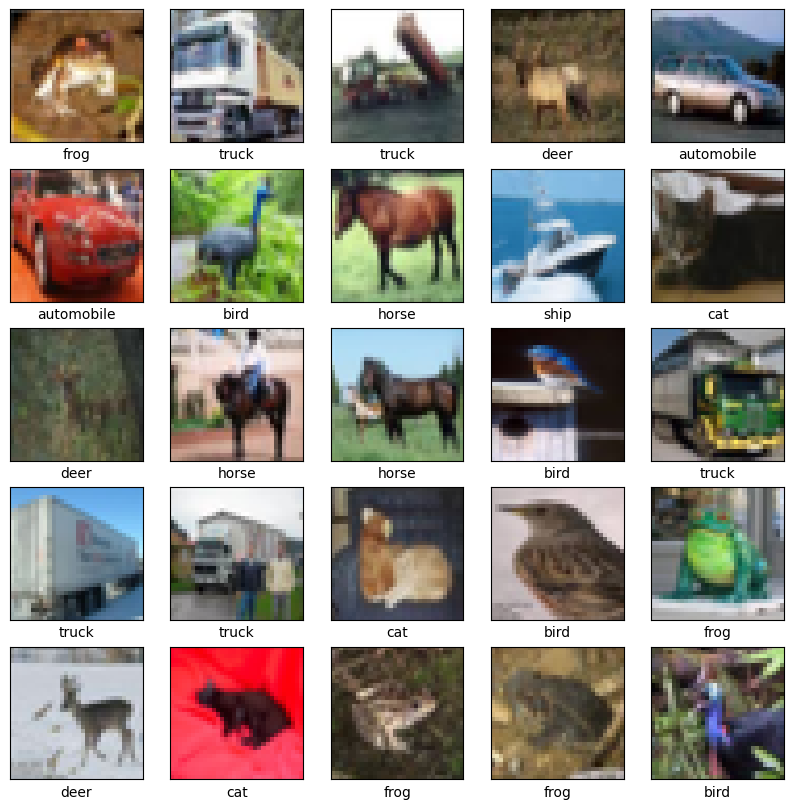

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3537 - loss: 1.7472 - val_accuracy: 0.5599 - val_loss: 1.2310
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5830 - loss: 1.1681 - val_accuracy: 0.5983 - val_loss: 1.1350
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6547 - loss: 0.9814 - val_accuracy: 0.6744 - val_loss: 0.9368
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6898 - loss: 0.8759 - val_accuracy: 0.6661 - val_loss: 0.9507
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7172 - loss: 0.8008 - val_accuracy: 0.7013 - val_loss: 0.8758
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7375 - loss: 0.7529 - val_accuracy: 0.6956 - val_loss: 0.8910
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7604 - loss: 0.6764 - val_accuracy: 0.7048 - val_loss: 0.8681
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7766 -

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - 8ms/step - accuracy: 0.7281 - loss: 0.8437
Test accuracy: 0.7281000018119812


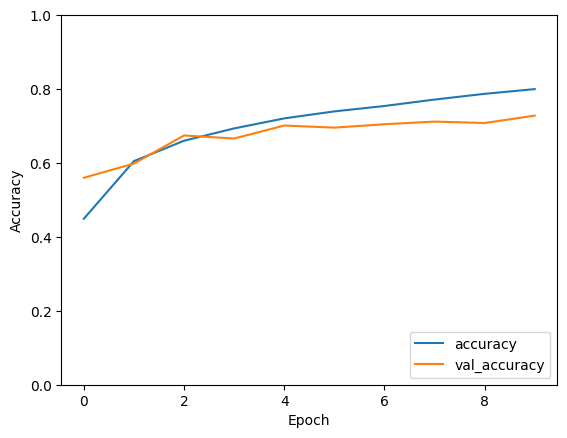

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**HANDWRITTEN DIGIT RECOGNITION USING CNNS (MNIST DATASET)**

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [10]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8934 - loss: 0.3382 - val_accuracy: 0.9865 - val_loss: 0.0420
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9850 - loss: 0.0487 - val_accuracy: 0.9869 - val_loss: 0.0413
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9916 - val_loss: 0.0284
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9919 - val_loss: 0.0248


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 7ms/step - accuracy: 0.9919 - loss: 0.0248
Test accuracy: 0.9919000267982483


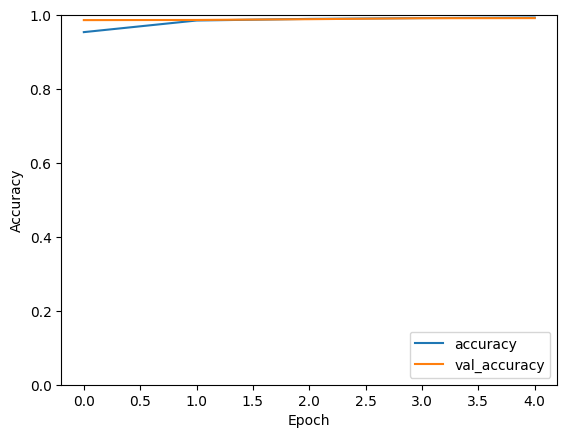

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**Fine-Tuning Pre-trained Models for Cat vs. Dog Classification**

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt


In [17]:
# Define paths to the train and validation datasets
train_dir = '/kaggle/input/cat-and-dog/training_set'
validation_dir = '/kaggle/input/cat-and-dog/test_set'

# Load the Cats vs. Dogs dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='training',
    validation_split=0.2,
    seed=123
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='validation',
    validation_split=0.2,
    seed=123
)

# Define the class names
class_names = train_dataset.class_names


Found 8005 files belonging to 1 classes.
Using 6404 files for training.
Found 2023 files belonging to 1 classes.
Using 404 files for validation.


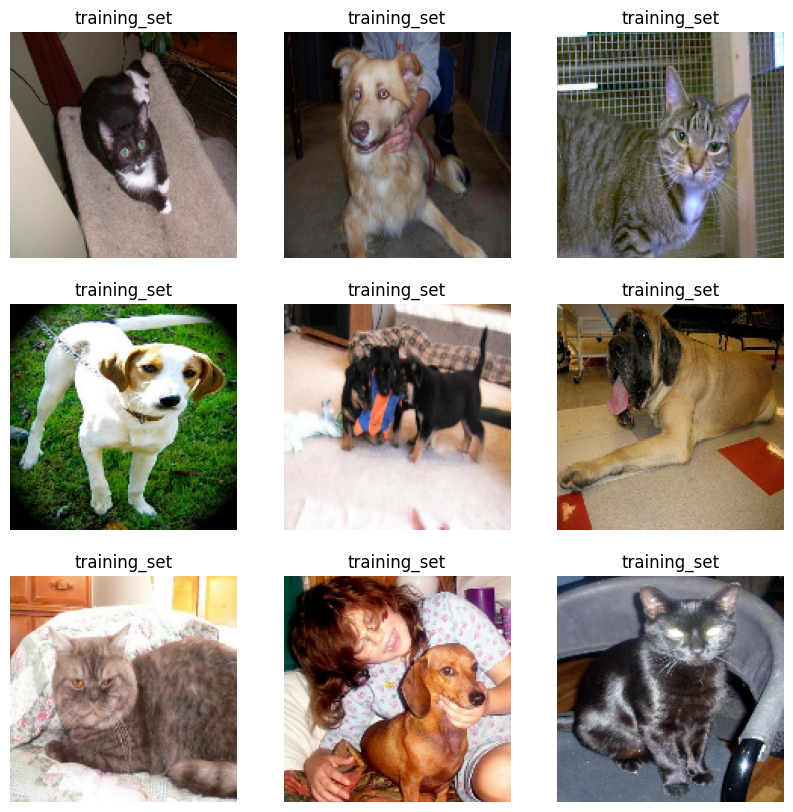

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [19]:
base_model = applications.VGG16(input_shape=(150, 150, 3),
                                include_top=False,
                                weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [21]:
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset)


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 0.9872 - loss: 0.1267 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 849s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 862s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 868s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [22]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=5,
                         validation_data=validation_dataset)


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 2801s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 2786s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 2792s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 2834s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 2848s 14s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [23]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation accuracy: 1.0


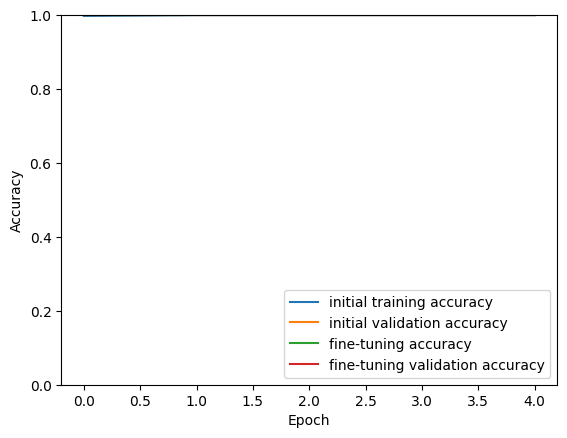

In [24]:
plt.plot(history.history['accuracy'], label='initial training accuracy')
plt.plot(history.history['val_accuracy'], label='initial validation accuracy')
if 'history_fine' in locals():
    plt.plot(history_fine.history['accuracy'], label='fine-tuning accuracy')
    plt.plot(history_fine.history['val_accuracy'], label='fine-tuning validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
